# Digit Recogniser using Vanilla Neural Networks#

We'll first import the relevant libraries
1. Numpy for LA
2. Pandas for CSV manipulation
3. Scikit-Learn for Vanilla NN
4. Seaborn and Matplotlib for data visualisation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.

# Any results you write to the current directory are saved as output.

## Data Manipulation and visualisation##

Now we'll read data and try to visualise how evenly it is  distributed

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
X = train.get_values()

In [4]:
y = X[:, 0]
X = X[:, 1:]

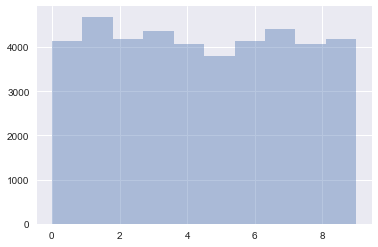

In [5]:
sns.distplot(y, bins=10, kde=False)

So it turns out the data is  evenly distributed, which is pretty good

## Classification ##

Now we have almost completed the main work and what's left is classification.
I am using a vanilla NN here but we could've used a CNN as well. Considering it's my first time I think we should keep things light and simple.

So here's how we'll go about doing this
1. We first normalise the data
2. We train the NN on the input data
3. Then run it on test set and output the result

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

/Users/osaidrehmannasir/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (1000))

In [8]:
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [9]:
X_test = test.get_values()
X_test = scaler.transform(X_test)
y_test = clf.predict(X_test)

/Users/osaidrehmannasir/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [10]:
output = pd.DataFrame(y_test, columns = ['Label'])
output.reset_index(inplace = True)
output.rename(columns = {'index' : 'ImageId'}, inplace = True)
output['ImageId'] = output['ImageId'] + 1
output.to_csv('output.csv', index = False)